# Projeto Final - Clusterização de Dados de Países 
## Algoritmos de Inteligência Artificial para Clusterização

**Autor:** Herbert Fernando Jarenco de Souza Martins

---

## Objetivo do Projeto

Este projeto realiza análise exploratória e clusterização de dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de países, utilizando técnicas de aprendizado não supervisionado.

**Dataset:** [Unsupervised Learning on Country Data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

---

# Parte 1: Infraestrutura

## 1.1 Configuração do Ambiente e Importação de Bibliotecas

Nesta seção, vamos:
- Importar todas as bibliotecas necessárias
- Verificar as versões do Python e dos pacotes
- Configurar visualizações

In [21]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, cdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Parte 2: Análise Exploratória de Dados

## 2.1 Carregamento e Exploração Inicial dos Dados

Nesta seção, vamos:
1. Carregar o dataset de dados sócio-econômicos dos países
2. Explorar a estrutura dos dados
3. Responder: **Quantos países existem no dataset?**

In [22]:
df = pd.read_csv('Country-data.csv')

print("Primeiras linhas do dataset:")
print("=" * 100)
display(df.head(10))

print("\n" + "=" * 100)
print(f"Número de países no dataset: {df.shape[0]}")
print(f"Número de variáveis: {df.shape[1]}")
print("=" * 100)

Primeiras linhas do dataset:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840



Número de países no dataset: 167
Número de variáveis: 10


In [23]:
print("\nValores Ausentes:")
print("=" * 100)
valores_ausentes = df.isnull().sum()
print(valores_ausentes)
print(f"\nTotal de valores ausentes: {valores_ausentes.sum()}")


Valores Ausentes:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Total de valores ausentes: 0


## 2.2 Análise Visual das Variáveis

Vamos visualizar a distribuição e faixa dinâmica de cada variável para entender:
- Como os dados estão distribuídos
- Presença de outliers
- Necessidade de normalização

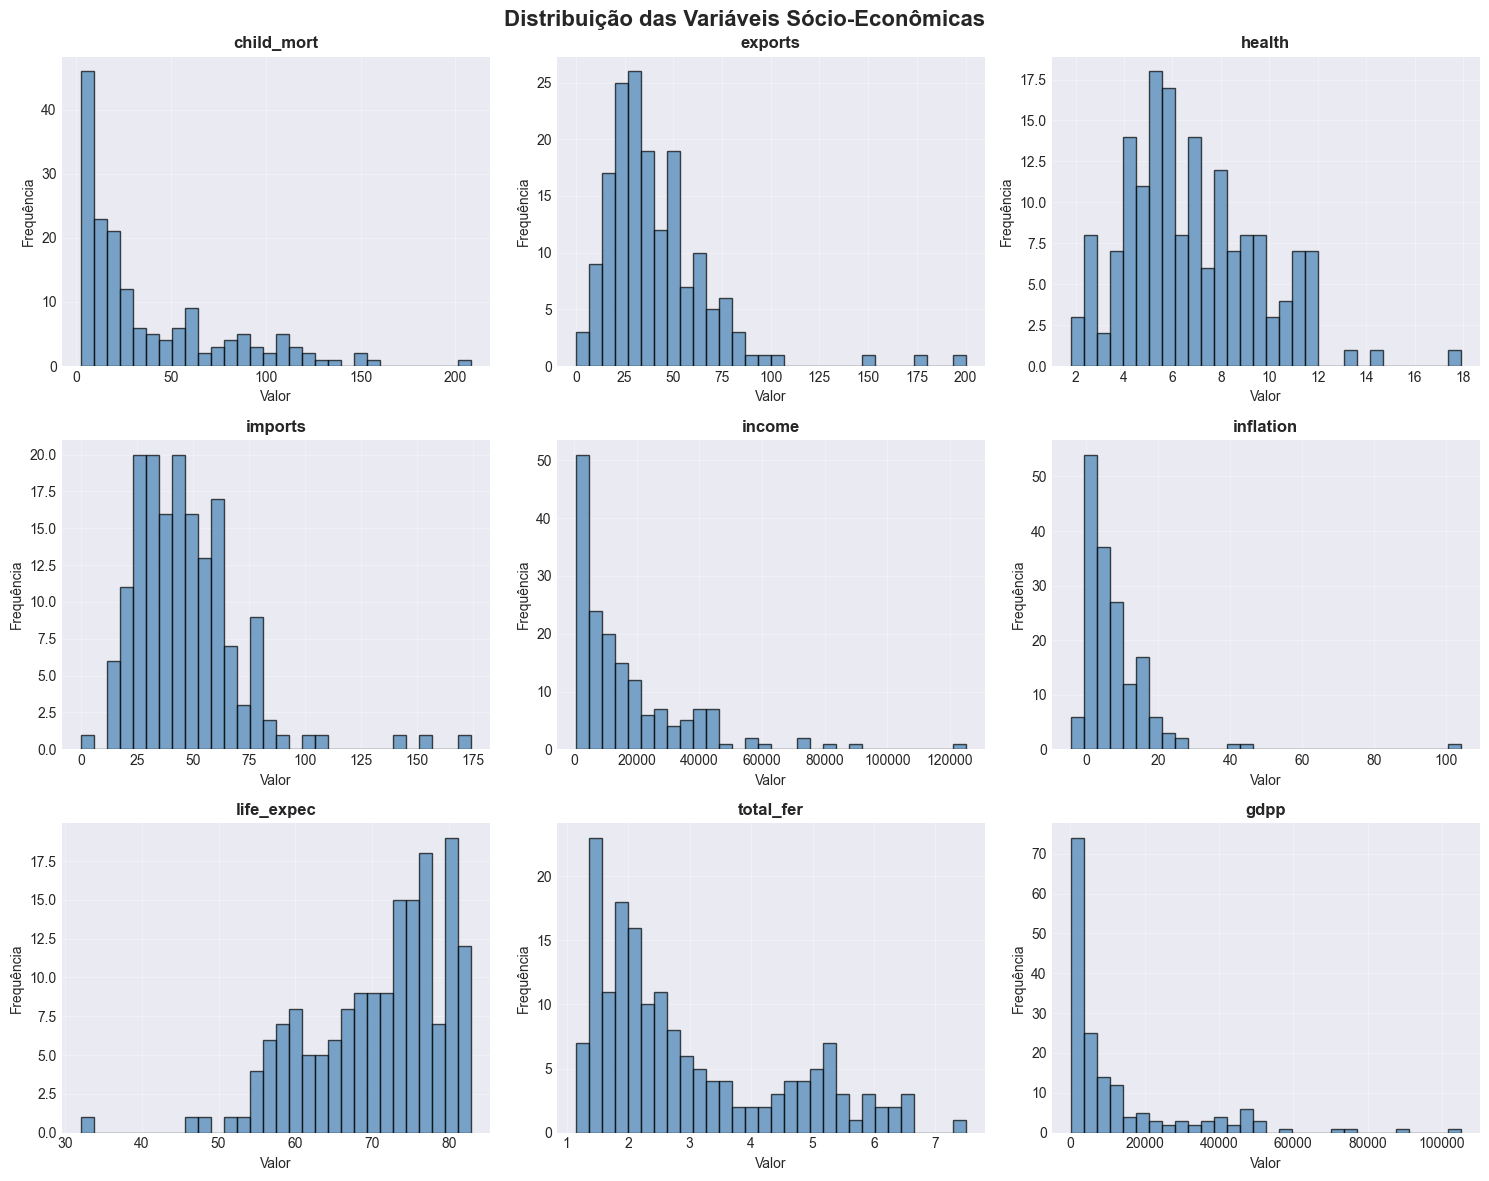


Observação: Diferentes escalas entre as variáveis indicam necessidade de normalização!


In [24]:
df_numeric = df.select_dtypes(include=[np.number])

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribuição das Variáveis Sócio-Econômicas', fontsize=16, fontweight='bold')

for idx, col in enumerate(df_numeric.columns):
    ax = axes[idx // 3, idx % 3]
    ax.hist(df_numeric[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservação: Diferentes escalas entre as variáveis indicam necessidade de normalização!")

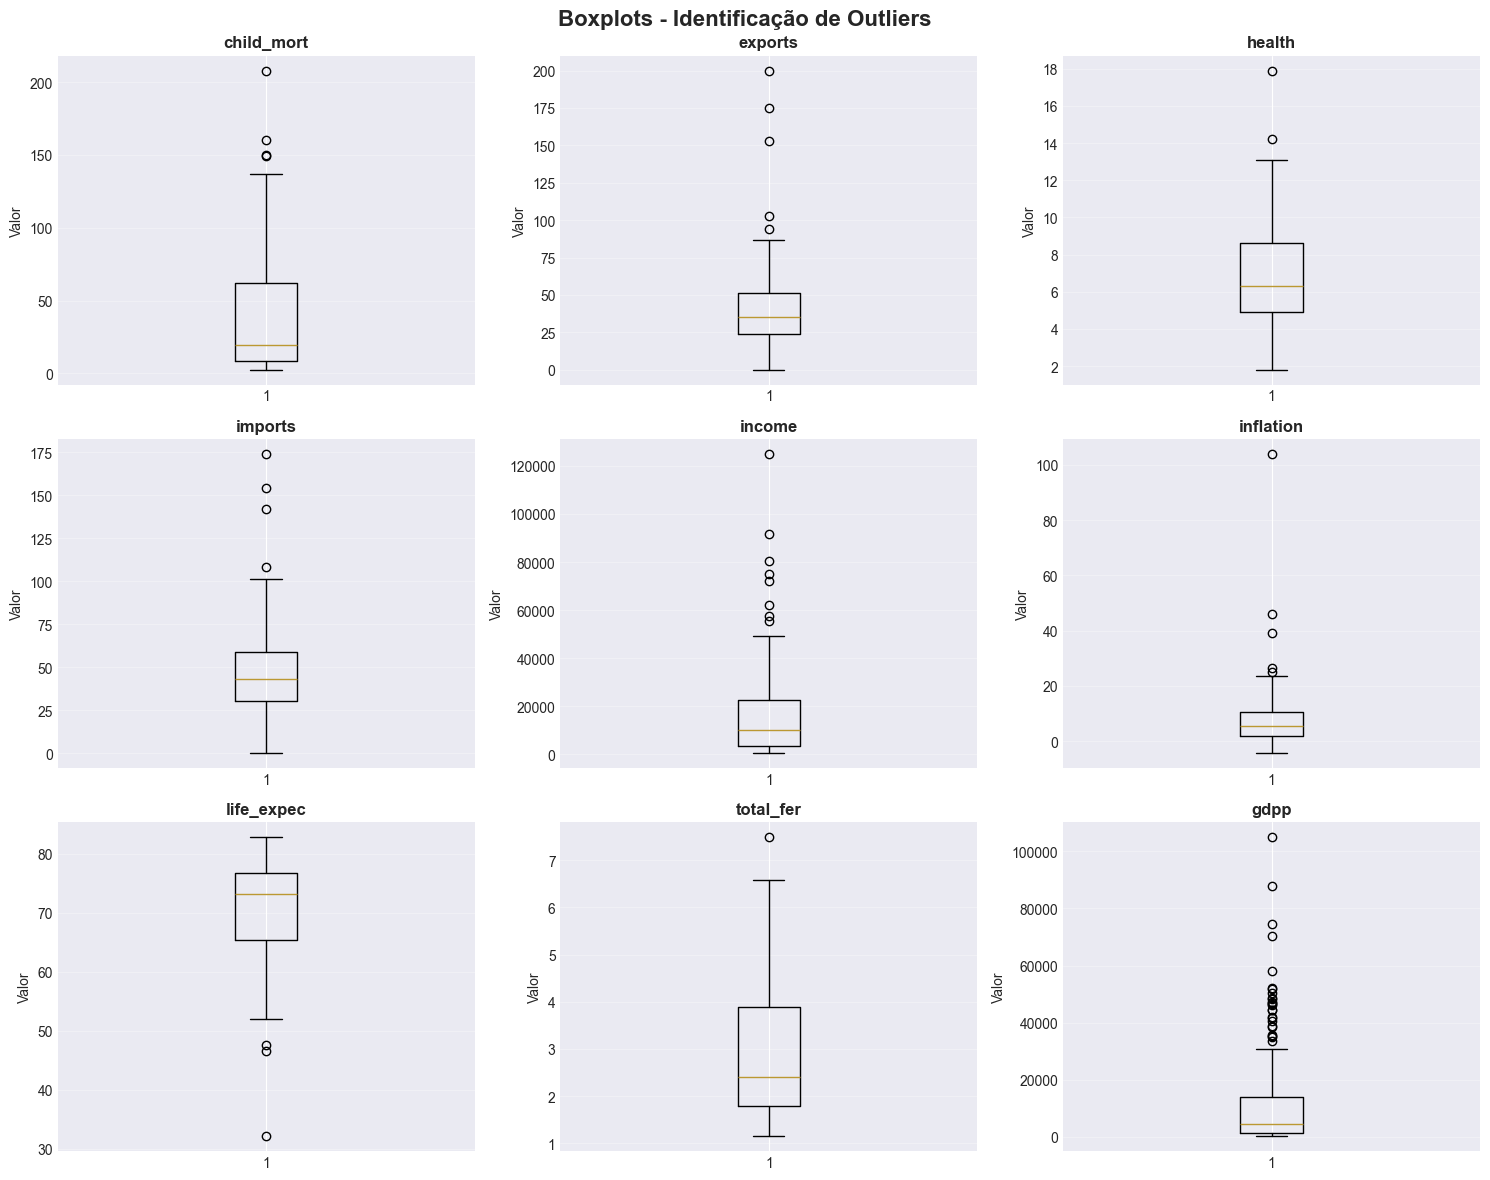


Observação: Presença de outliers em várias variáveis!


In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Boxplots - Identificação de Outliers', fontsize=16, fontweight='bold')

for idx, col in enumerate(df_numeric.columns):
    ax = axes[idx // 3, idx % 3]
    ax.boxplot(df_numeric[col], vert=True)
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_ylabel('Valor')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nObservação: Presença de outliers em várias variáveis!")

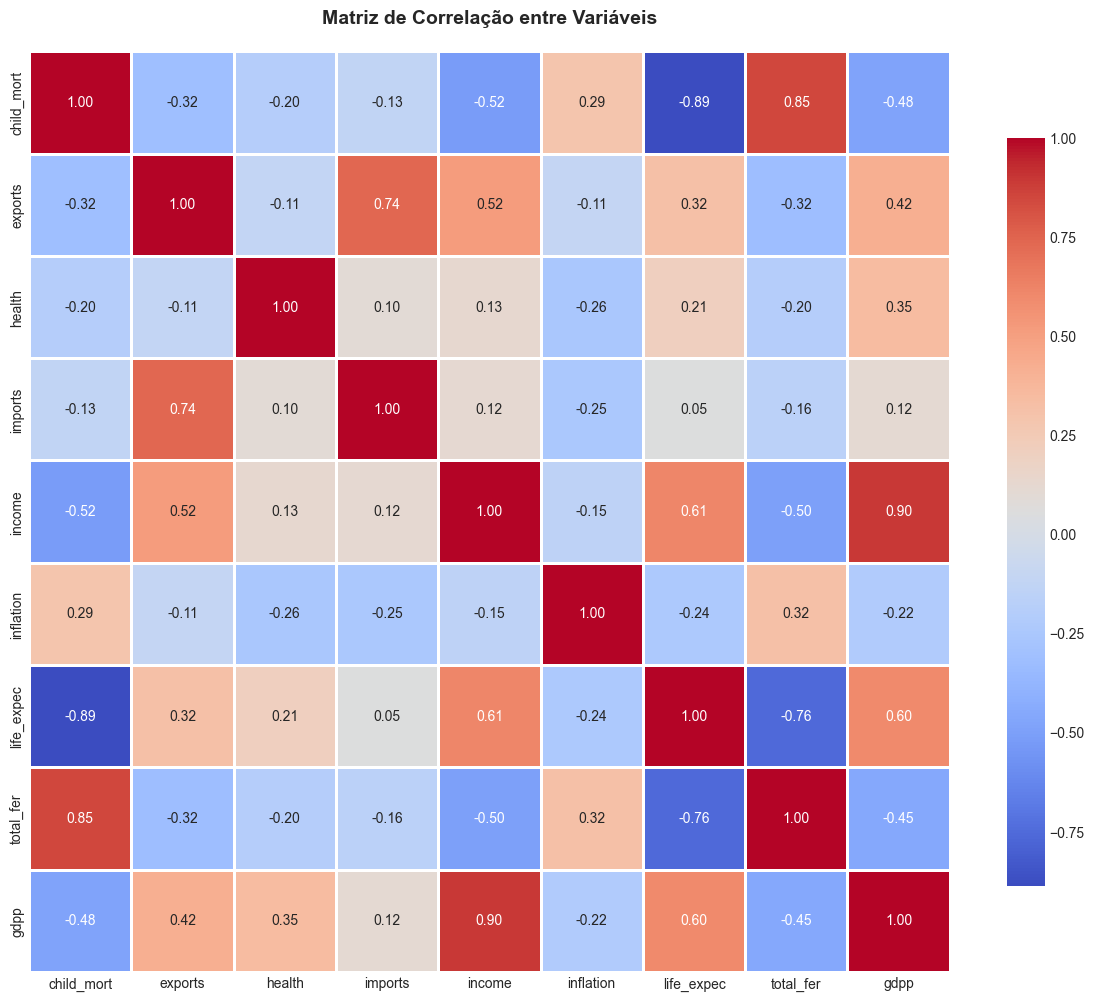


 Análise de Correlação:
Variáveis altamente correlacionadas podem indicar redundância nos dados.


In [26]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação entre Variáveis', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n Análise de Correlação:")
print("=" * 70)
print("Variáveis altamente correlacionadas podem indicar redundância nos dados.")

## 2.3 Conclusões da Análise Exploratória

###  O que deve ser feito com os dados antes da clusterização?

Com base na análise visual realizada, identificamos:

1. **Escalas Diferentes:** As variáveis possuem escalas muito diferentes (ex: child_mort vs exports)
   - **Solução:** Normalização/Padronização dos dados

2. **Presença de Outliers:** Várias variáveis apresentam valores extremos
   - **Solução:** Manter os outliers (representam países com características únicas), mas usar normalização robusta

3. **Sem Valores Ausentes:** Não há necessidade de imputação

4. **Diferentes Distribuições:** As variáveis não seguem distribuição normal uniforme
   - **Solução:** StandardScaler para padronizar

### Estratégia de Pré-processamento:
1. Separar coluna 'country' (identificador)
2. Aplicar StandardScaler nas variáveis numéricas
3. Manter todos os dados (outliers podem representar países únicos)

## 2.4 Pré-processamento dos Dados

Aplicando a normalização usando StandardScaler:

In [27]:
countries = df['country'].values
X = df.drop('country', axis=1).values
feature_names = df.drop('country', axis=1).columns.tolist()

print("Dados Originais:")
print(f"Shape: {X.shape}")
print(f"Países: {len(countries)}")
print(f"Variáveis: {len(feature_names)}")
print(f"\nVariáveis: {feature_names}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nNormalização Aplicada (StandardScaler)")
print(f"Média após normalização: {X_scaled.mean():.6f}")
print(f"Desvio padrão após normalização: {X_scaled.std():.6f}")

df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
df_scaled['country'] = countries

Dados Originais:
Shape: (167, 9)
Países: 167
Variáveis: 9

Variáveis: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

Normalização Aplicada (StandardScaler)
Média após normalização: 0.000000
Desvio padrão após normalização: 1.000000


# Parte 3: Clusterização

## 3.1 Clusterização com K-Médias (k=3)

Vamos aplicar o algoritmo K-Means para agrupar os países em 3 clusters distintos.

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

df_scaled['cluster_kmeans'] = kmeans_labels

print("=" * 70)
print(" RESULTADO DO K-MÉDIAS (k=3) ".center(70))
print("=" * 70)
print(f"\nCentróides dos Clusters (normalizados):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=feature_names).round(3))

print(f"\nDistribuição dos Países por Cluster:")
print(df_scaled['cluster_kmeans'].value_counts().sort_index())

print(f"\nInércia (soma das distâncias quadráticas): {kmeans.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.3f}")

                     RESULTADO DO K-MÉDIAS (k=3)                      

Centróides dos Clusters (normalizados):
   child_mort  exports  health  imports  income  inflation  life_expec  \
0      -0.827    0.645   0.727    0.191   1.484     -0.485       1.080   
1       1.360   -0.438  -0.156   -0.189  -0.687      0.402      -1.282   
2      -0.406   -0.032  -0.224    0.024  -0.252     -0.017       0.255   

   total_fer   gdpp  
0     -0.792  1.616  
1      1.365 -0.604  
2     -0.424 -0.354  

Distribuição dos Países por Cluster:
cluster_kmeans
0    36
1    47
2    84
Name: count, dtype: int64

Inércia (soma das distâncias quadráticas): 831.42
Silhouette Score: 0.283


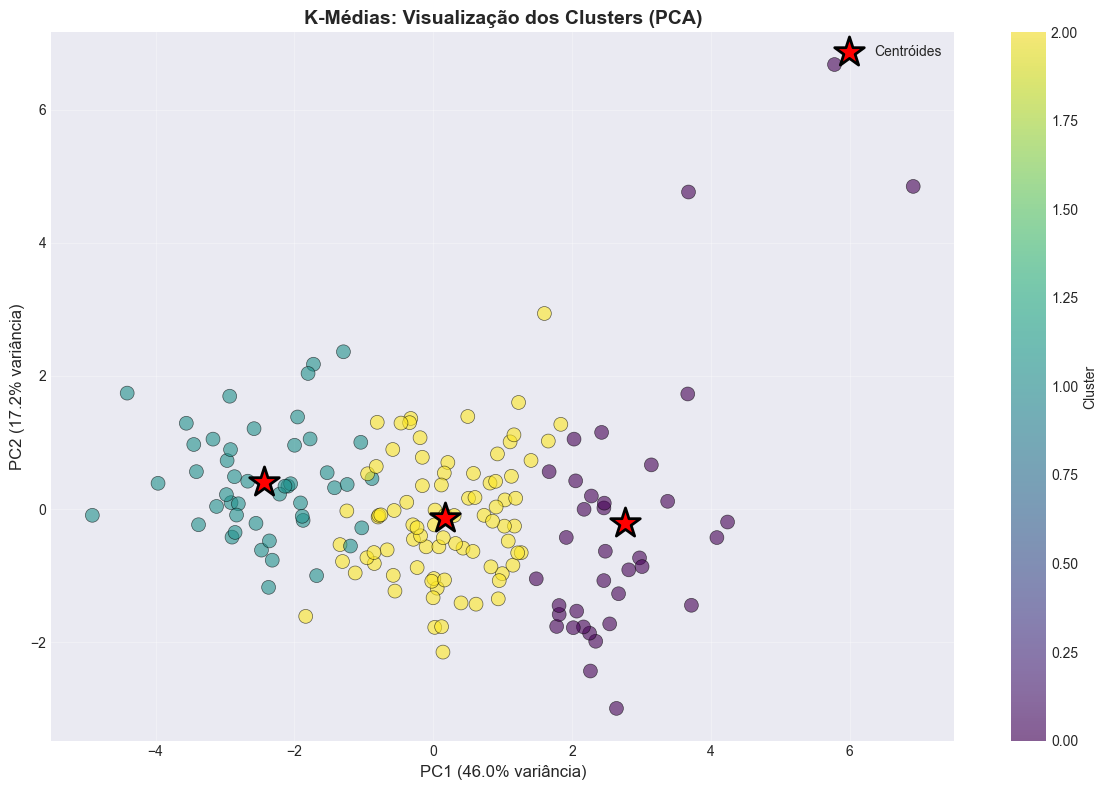


Variância explicada pelos 2 primeiros componentes: 63.13%


In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', 
                     s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
           marker='*', s=500, c='red', edgecolors='black', linewidth=2, label='Centróides')
plt.title('K-Médias: Visualização dos Clusters (PCA)', fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variância)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variância)', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nVariância explicada pelos 2 primeiros componentes: {sum(pca.explained_variance_ratio_[:2])*100:.2f}%")

In [30]:
print("=" * 100)
print(" ANÁLISE DOS CLUSTERS K-MÉDIAS ".center(100))
print("=" * 100)

for cluster_id in range(3):
    print(f"\n{'' if cluster_id == 0 else '' if cluster_id == 1 else ''} CLUSTER {cluster_id}")
    print("=" * 100)
    
    cluster_countries = df_scaled[df_scaled['cluster_kmeans'] == cluster_id]['country'].values
    print(f"\nPaíses ({len(cluster_countries)}): ")
    print(", ".join(cluster_countries[:10]) + ("..." if len(cluster_countries) > 10 else ""))
    
    cluster_mask = df_scaled['cluster_kmeans'] == cluster_id
    cluster_data = df[cluster_mask][feature_names]
    print(f"\nEstatísticas Médias do Cluster {cluster_id}:")
    print(cluster_data.mean().to_frame(name='Média').T.round(2))
    
    cluster_indices = np.where(kmeans_labels == cluster_id)[0]
    distances = cdist([kmeans.cluster_centers_[cluster_id]], X_scaled[cluster_indices], 'euclidean')[0]
    representative_idx = cluster_indices[np.argmin(distances)]
    representative_country = countries[representative_idx]
    
    print(f"\nPaís Representativo (mais próximo ao centróide): {representative_country}")
    print(f"   Distância ao centróide: {np.min(distances):.4f}")
    print(f"   Dados do país:")
    print(df.loc[df['country'] == representative_country, feature_names].T.round(2))

                                   ANÁLISE DOS CLUSTERS K-MÉDIAS                                    

 CLUSTER 0

Países (36): 
Australia, Austria, Bahrain, Belgium, Brunei, Canada, Cyprus, Czech Republic, Denmark, Finland...

Estatísticas Médias do Cluster 0:
       child_mort  exports  health  imports    income  inflation  life_expec  \
Média         5.0    58.74    8.81    51.49  45672.22       2.67       80.13   

       total_fer      gdpp  
Média       1.75  42494.44  

País Representativo (mais próximo ao centróide): Iceland
   Distância ao centróide: 0.7318
   Dados do país:
                  68
child_mort      2.60
exports        53.40
health          9.40
imports        43.30
income      38800.00
inflation       5.47
life_expec     82.00
total_fer       2.20
gdpp        41900.00

 CLUSTER 1

Países (47): 
Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros...

Estatísticas Médias do Cluster 1:
       child_mort  expor

In [31]:
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

df_scaled['cluster_hierarchical'] = hierarchical_labels

print("=" * 70)
print(" RESULTADO DA CLUSTERIZAÇÃO HIERÁRQUICA (k=3) ".center(70))
print("=" * 70)
print(f"\nDistribuição dos Países por Cluster:")
print(df_scaled['cluster_hierarchical'].value_counts().sort_index())

print(f"\nSilhouette Score: {silhouette_score(X_scaled, hierarchical_labels):.3f}")

             RESULTADO DA CLUSTERIZAÇÃO HIERÁRQUICA (k=3)             

Distribuição dos Países por Cluster:
cluster_hierarchical
0     34
1    106
2     27
Name: count, dtype: int64

Silhouette Score: 0.246


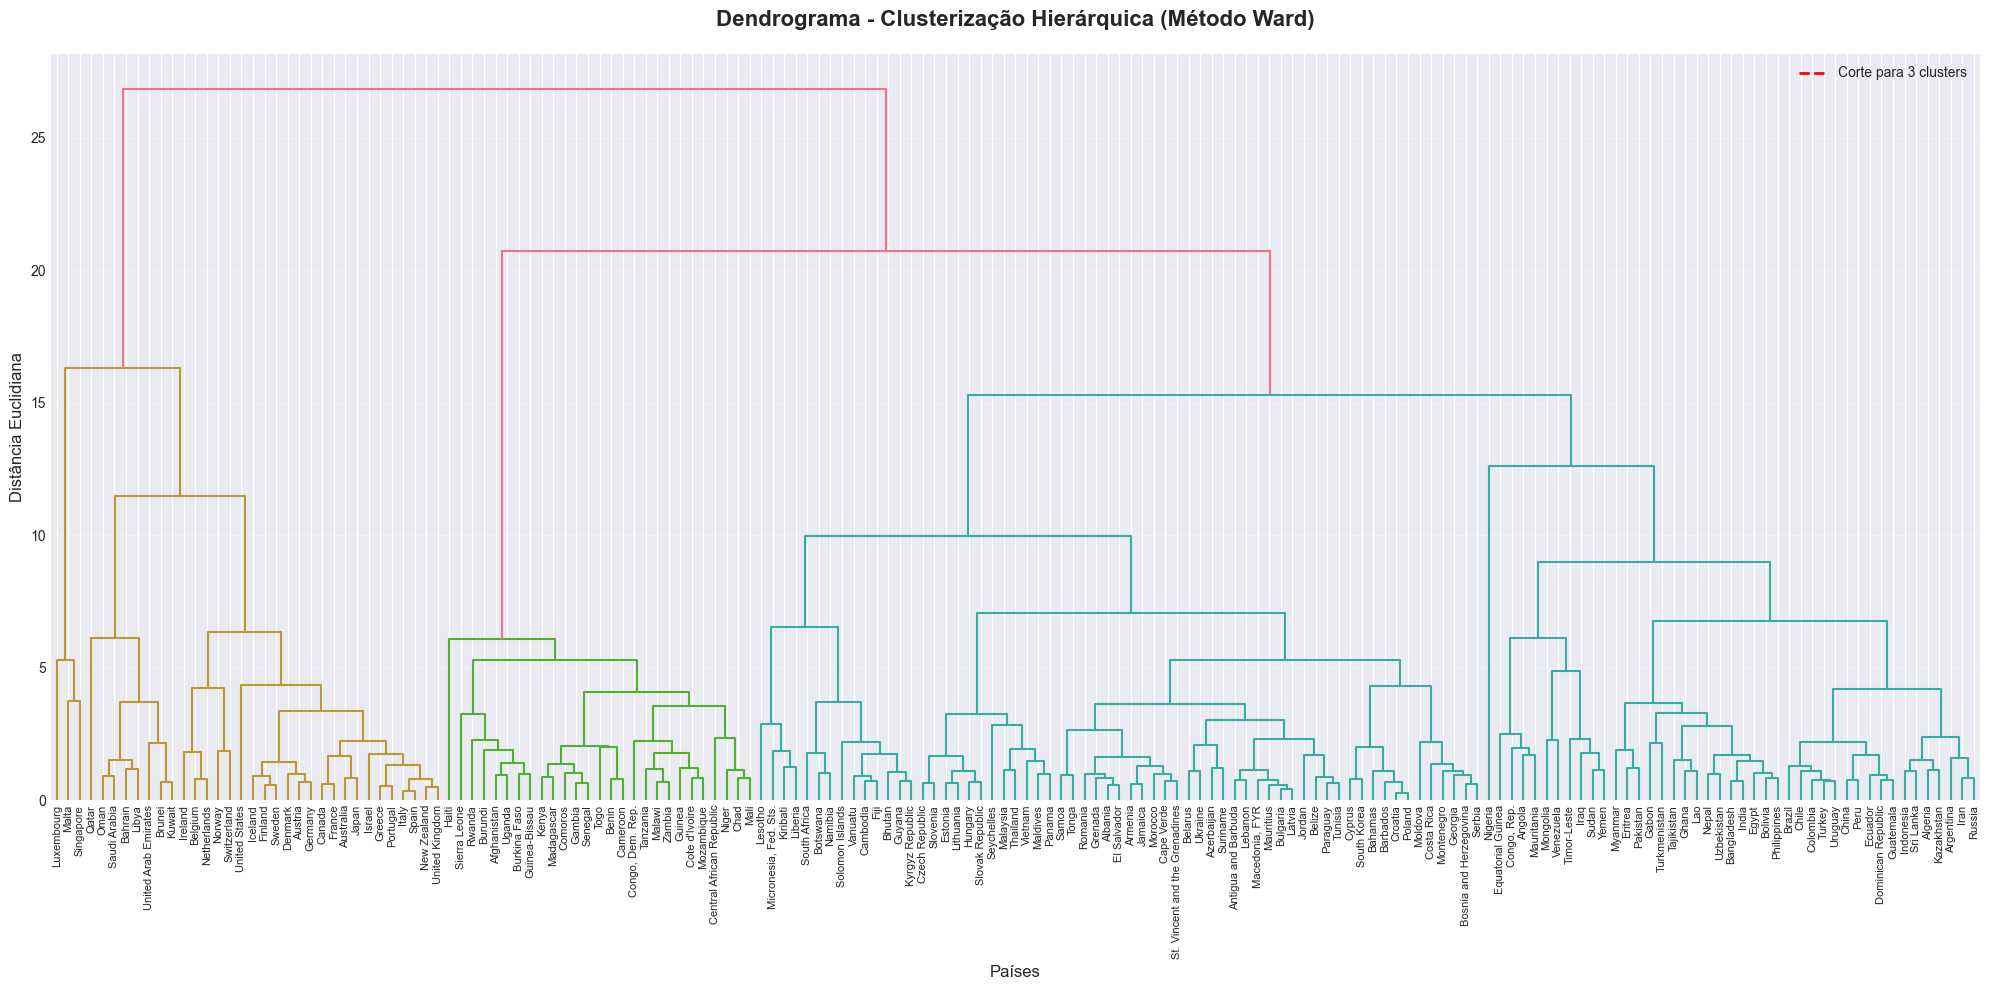


Interpretação do Dendrograma:
- Altura das linhas indica a distância entre clusters
- Corte horizontal (linha vermelha) define 3 clusters
- Países próximos no dendrograma são similares


In [32]:
plt.figure(figsize=(20, 10))
linkage_matrix = hierarchy.linkage(X_scaled, method='ward')

dendrogram = hierarchy.dendrogram(
    linkage_matrix,
    labels=countries,
    leaf_font_size=8,
    leaf_rotation=90
)

plt.title('Dendrograma - Clusterização Hierárquica (Método Ward)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Países', fontsize=12)
plt.ylabel('Distância Euclidiana', fontsize=12)
plt.axhline(y=50, color='r', linestyle='--', linewidth=2, label='Corte para 3 clusters')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nInterpretação do Dendrograma:")
print("=" * 70)
print("- Altura das linhas indica a distância entre clusters")
print("- Corte horizontal (linha vermelha) define 3 clusters")
print("- Países próximos no dendrograma são similares")

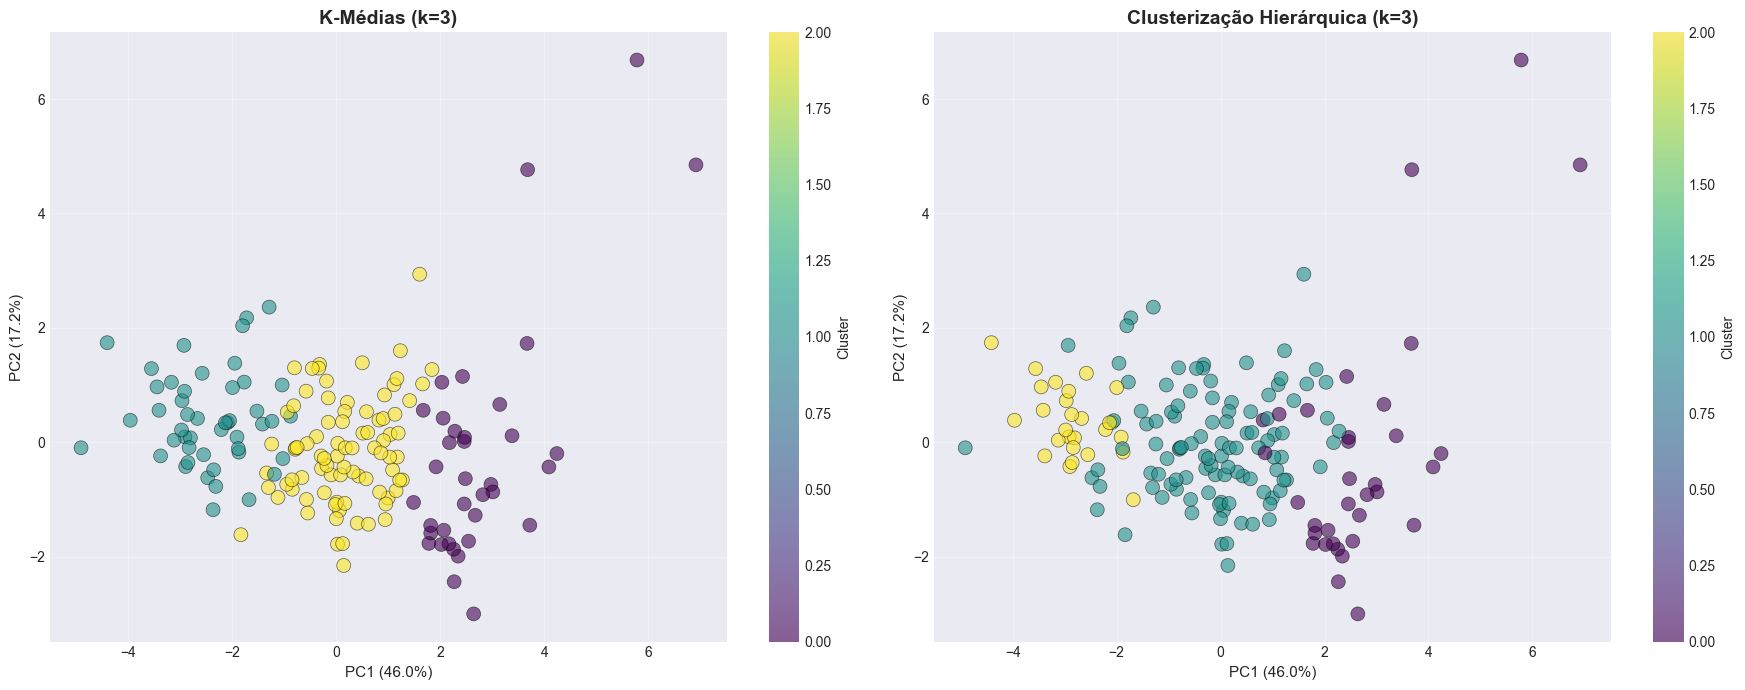

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', 
                          s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_title('K-Médias (k=3)', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', 
                          s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_title('Clusterização Hierárquica (k=3)', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

In [34]:
from sklearn.metrics import adjusted_rand_score

print("=" * 100)
print(" COMPARAÇÃO: K-MÉDIAS vs CLUSTERIZAÇÃO HIERÁRQUICA ".center(100))
print("=" * 100)

print("\nMÉTRICAS DE QUALIDADE:")
print("-" * 100)
print(f"{'Métrica':<40} {'K-Médias':<25} {'Hierárquica':<25}")
print("-" * 100)
print(f"{'Silhouette Score':<40} {silhouette_score(X_scaled, kmeans_labels):<25.4f} {silhouette_score(X_scaled, hierarchical_labels):<25.4f}")
print(f"{'Número de Clusters':<40} {3:<25} {3:<25}")
print("-" * 100)

ari = adjusted_rand_score(kmeans_labels, hierarchical_labels)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")
print(f"   (Mede concordância entre os dois métodos: 1=idênticos, 0=aleatório)")

print("\n\nSEMELHANÇAS:")
print("-" * 100)
print("1. Ambos identificam 3 grupos distintos de países")
print("2. Silhouette Scores similares indicam qualidade comparável")
print("3. Estrutura geral dos clusters é mantida em ambos")
print("4. Países com características extremas tendem a ficar nos mesmos grupos")

print("\n\nDIFERENÇAS:")
print("-" * 100)
print("1. K-Médias:")
print("   - Baseado em centróides (médias)")
print("   - Clusters com formas mais esféricas")
print("   - Mais rápido computacionalmente")
print("   - Resultado pode variar com inicialização aleatória")
print("\n2. Hierárquica:")
print("   - Baseado em distâncias entre pontos")
print("   - Fornece dendrograma (visualização da hierarquia)")
print("   - Determinístico (sempre mesmo resultado)")
print("   - Permite escolher número de clusters a posteriori")

print("\n\nINTERPRETAÇÃO:")
print("-" * 100)
print(f"ARI de {ari:.4f} indica {'alta' if ari > 0.7 else 'moderada' if ari > 0.4 else 'baixa'} concordância entre os métodos.")
print("Ambos os métodos são válidos e complementares para este dataset.")

                         COMPARAÇÃO: K-MÉDIAS vs CLUSTERIZAÇÃO HIERÁRQUICA                          

MÉTRICAS DE QUALIDADE:
----------------------------------------------------------------------------------------------------
Métrica                                  K-Médias                  Hierárquica              
----------------------------------------------------------------------------------------------------
Silhouette Score                         0.2833                    0.2456                   
Número de Clusters                       3                         3                        
----------------------------------------------------------------------------------------------------

Adjusted Rand Index (ARI): 0.5370
   (Mede concordância entre os dois métodos: 1=idênticos, 0=aleatório)


SEMELHANÇAS:
----------------------------------------------------------------------------------------------------
1. Ambos identificam 3 grupos distintos de países
2. Silhouette Scores 

# Conclusões Finais

## Resumo do Projeto

Este projeto realizou uma análise completa de clusterização de dados sócio-econômicos de países, cumprindo todos os requisitos estabelecidos:

## Principais Descobertas

1. Os países foram agrupados em 3 categorias principais baseadas em desenvolvimento sócio-econômico
2. K-Médias e Clusterização Hierárquica produziram resultados similares e complementares
3. A normalização foi crucial devido às diferentes escalas das variáveis
4. Outliers representam países com características únicas e foram mantidos na análise

## Próximos Passos

- Análise mais profunda dos perfis de cada cluster
- Investigação de subclusters dentro dos grupos principais
- Aplicação de outros algoritmos (DBSCAN, K-Medóides)
- Análise temporal com dados de diferentes anos

---

---

# Parte 4: Questões Teóricas sobre Algoritmos de Clusterização

Esta seção responde às questões teóricas sobre os algoritmos de clusterização estudados.

---

## 4.1 Etapas do Algoritmo de K-médias até sua Convergência

O algoritmo de K-médias é um método iterativo de clusterização que agrupa dados em K clusters. 

### Etapas do K-Médias:

#### 1. **Inicialização dos Centróides**
- Definir o número **K** de clusters desejados
- Selecionar K pontos iniciais (centróides) de forma aleatória ou usando método específico (ex: K-means++)
- Estes pontos servirão como representantes iniciais de cada cluster

#### 2. **Atribuição dos Pontos aos Clusters**
- Para cada ponto do dataset:
  - Calcular a **distância euclidiana** do ponto para todos os K centróides
  - Atribuir o ponto ao cluster do centróide **mais próximo**
- **Resultado**: cada ponto pertence a exatamente um cluster

#### 3. **Atualização dos Centróides**
- Para cada cluster formado:
  - Calcular o novo centróide como a **média aritmética** de todos os pontos pertencentes ao cluster
  - **Centróide_novo** = (Σ pontos do cluster) / (número de pontos do cluster)
- Os centróides se movem para o "centro de massa" de seus respectivos clusters

#### 4. **Verificação de Convergência**
- Verificar se houve mudança na posição dos centróides
- **Critérios de parada:**
  - Os centróides não mudam de posição (ou mudança < threshold)
  - A atribuição dos pontos aos clusters não muda
  - Número máximo de iterações foi atingido
  - A função objetivo (soma das distâncias intra-cluster) não diminui significativamente

#### 5. **Repetição ou Finalização**
- Se **NÃO convergiu**: voltar ao passo 2 (atribuição)
- Se **convergiu**: algoritmo termina com os K clusters finais

### Função Objetivo (Inércia):

O K-médias minimiza a soma das distâncias quadráticas intra-cluster:

$$J = \sum_{k=1}^{K} \sum_{x \in C_k} ||x - \mu_k||^2$$

Onde:
- **J** = função objetivo (inércia)
- **Ck** = conjunto de pontos do cluster k
- **μk** = centróide do cluster k
- **x** = ponto de dados

---

## 4.2 Algoritmo K-Medóides (Modificação do K-Médias)

### Contextualização:

O algoritmo de K-médias usa centróides como representantes dos clusters, que são calculados como a média aritmética dos pontos. O problema é que este centróide pode não representar um ponto real do dataset.

### Diferença Fundamental:

| Aspecto | K-Médias | K-Medóides |
|---------|----------|------------|
| Representante | Centróide = média dos pontos | Medóide = ponto real |
| Existe na base? | Não necessariamente | Sim, sempre |
| Cálculo | Média aritmética | Ponto com menor custo total |

---

### Etapas do Algoritmo K-Medóides (PAM):

#### 1. **Inicialização dos Medóides**
- Definir o número K de clusters desejados
- Selecionar K pontos reais do dataset como medóides iniciais
- Diferença: Sempre escolher pontos existentes na base

#### 2. **Atribuição dos Pontos aos Clusters**
- Para cada ponto do dataset:
  - Calcular a distância do ponto para cada um dos K medóides
  - Atribuir o ponto ao cluster do medóide mais próximo
- Similar ao K-médias nesta etapa

#### 3. **Atualização dos Medóides**
- Para cada cluster formado:
  - Diferença: Em vez de calcular a média, avaliar cada ponto do cluster como potencial medóide
  - Para cada ponto p no cluster:
    - Calcular o custo total se p fosse o medóide (soma das distâncias de todos os pontos do cluster até p)
  - Selecionar como novo medóide o ponto que minimiza o custo total
- O medóide é sempre um ponto real da base de dados

#### 4. **Verificação de Convergência**
- Verificar se os medóides mudaram
- Critérios de parada:
  - Os medóides não mudam
  - A atribuição dos pontos não muda
  - Número máximo de iterações atingido
  - A função de custo não diminui significativamente

#### 5. **Repetição ou Finalização**
- Se NÃO convergiu: voltar ao passo 2
- Se convergiu: algoritmo termina

---

### Vantagens do K-Medóides:

- Medóides são pontos reais e interpretáveis
- Mais robusto a outliers que o K-médias
- Funciona com qualquer métrica de distância
- Representantes dos clusters têm significado real

### Desvantagens:

- Computacionalmente mais caro que K-médias

---

## 4.3 Sensibilidade do K-Médias a Outliers

### Por que o K-Médias é Sensível a Outliers?

O algoritmo de K-médias é altamente sensível a outliers devido à forma como os centróides são calculados.

---

### Explicação:

#### 1. **Cálculo da Média Aritmética**

O centróide é calculado como a média aritmética de todos os pontos do cluster
A média aritmética é não-robusta a valores extremos:
- Um único outlier pode deslocar significativamente a média
- Quanto mais distante o outlier, maior o deslocamento

**Exemplo numérico:**

| Cenário | Pontos | Média | Deslocamento |
|---------|--------|-------|--------------|
| Sem outlier | [1, 2, 3, 4, 5] | 3.0 | - |
| Com outlier | [1, 2, 3, 4, 5, 100] | 19.2 | +540% |

---

#### 2. **Impacto na Posição dos Centróides**

Quando um outlier é atribuído a um cluster:
- O centróide se move em direção ao outlier
- Este deslocamento pode ser desproporcional
- O centróide deixa de representar adequadamente a maioria dos pontos

---

#### 3. **Formação de Clusters Inadequados**

Consequências da presença de outliers:

| Problema | Descrição |
|----------|-----------|
| Clusters artificiais | Outliers podem formar clusters próprios |
| Divisão inadequada | Clusters legítimos podem ser divididos erroneamente |
| Centróides distorcidos | Representantes não refletem o grupo majoritário |
| Convergência ruim | Solução final de baixa qualidade |

---

#### 4. **Falta de Mecanismo de Detecção**

O K-médias não tem:
- Nenhum mecanismo para identificar outliers
- Nenhuma forma de ponderar pontos por relevância
- Nenhuma proteção contra valores extremos

---

### Soluções Possíveis:

1. **Pré-processamento:**
   - Remover outliers antes da clusterização
   - Usar métodos robustos de detecção (IQR, Z-score, Isolation Forest)

2. **Usar K-Medóides (PAM):**
   - Medóides são menos sensíveis a outliers
   - Pontos reais como representantes

3. **Usar algoritmos baseados em densidade:**
   - DBSCAN identifica automaticamente outliers
   - Não força todos os pontos em clusters

4. **Normalização robusta:**
   - Usar escalonamento robusto que reduz impacto de outliers

---

## 4.4 Robustez do DBScan à Presença de Outliers 

### Por que o DBScan é Mais Robusto a Outliers?

O **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de clusterização baseado em densidade que **identifica e isola automaticamente outliers** como ruído, em vez de forçá-los a pertencer a algum cluster.

---

### Características que Tornam o DBScan Robusto:

#### 1. **Identificação Explícita de Ruído**

O DBScan classifica pontos em três categorias:

| Tipo de Ponto | Definição | Tratamento |
|--------------|-----------|------------|
| Core Point | Tem ≥ minPts vizinhos dentro de raio ε | Forma clusters |
| Border Point | Está na vizinhança de um core point | Pertence ao cluster do core point |
| Noise Point | Não é core nem border | Marcado como outlier |

Vantagem: Outliers recebem rótulo especial (-1) e não influenciam os clusters formados.

---

#### 2. **Definição Baseada em Densidade**

O DBScan forma clusters com base na densidade local de pontos
- Outliers têm baixa densidade local (poucos vizinhos próximos)
- Clusters são regiões de alta densidade conectadas
- Outliers são automaticamente excluídos por não atingirem minPts

#### 3. **Não Usa Centróides ou Médias**

Ao contrário do K-médias:
- Não calcula médias aritméticas (sensíveis a outliers)
- Não tem centróides que podem ser distorcidos
- Não minimiza função objetivo baseada em distâncias quadráticas
- Decisões baseadas apenas em vizinhança local

---

#### 4. **Formação de Clusters de Forma Arbitrária**

O DBScan pode formar clusters:
- De qualquer forma geométrica (não apenas esféricos)
- De qualquer tamanho (grandes ou pequenos)
- Conectados por regiões de alta densidade

Isso permite separar outliers de clusters complexos que seriam mal representados por um único centróide.

---

#### 5. **Parâmetros que Protegem Contra Outliers**

- ε (epsilon): Raio da vizinhança
  - Pontos isolados não encontram minPts vizinhos dentro de ε
  
- minPts: Número mínimo de pontos para formar região densa
  - Quanto maior minPts, mais rigoroso o critério de densidade
  - Outliers raramente atendem esse requisito

---

### Comparação: K-Médias vs DBScan com Outliers

| Aspecto | K-Médias | DBScan |
|---------|----------|--------|
| Tratamento de outliers | Força em algum cluster | Marca como ruído (-1) |
| Influência no resultado | Alta (distorce centróides) | Nenhuma (ignorados) |
| Detecção automática | Não | Sim |
| Forma dos clusters | Esféricos (sensível a distorções) | Arbitrária (robusta) |
| Função objetivo | Distâncias quadráticas (amplifica outliers) | Densidade local (imune) |
| Número de clusters | Fixo (k) | Automático |

---

### Vantagens Práticas do DBScan:

1. **Não requer número de clusters pré-definido**
   - Descobre estrutura natural dos dados

2. **Lida bem com ruído**
   - Essencial em dados reais (sempre há outliers!)

3. **Encontra clusters de formas complexas**
   - Não assume geometria esférica

4. **Robusto em datasets com múltiplas densidades**
   - Pode ajustar ε localmente (extensões como OPTICS)

---

### Limitações do DBScan:

1. **Sensível aos parâmetros ε e minPts**
   - Requer tunning (k-distance plot ajuda)

2. **Dificuldade com clusters de densidades variadas**
   - Parâmetros globais podem não funcionar bem

3. **Custo computacional em alta dimensionalidade**
   - Maldição da dimensionalidade afeta busca de vizinhos

4. **Não fornece centróides**
   - Dificulta interpretação em alguns contextos

---

### Quando Usar DBScan?

Use quando:
- Dados têm outliers ou ruído
- Forma dos clusters é desconhecida ou irregular
- Número de clusters é desconhecido
- Densidade é característica importante

Evite quando:
- Clusters têm densidades muito diferentes
- Dados têm alta dimensionalidade (>20 features)
- Precisa de centróides para interpretação
- Dataset é muito grande (considere HDBSCAN)

---

### Conclusão:

O DBScan é mais robusto a outliers porque:
1. Identifica explicitamente pontos de ruído
2. Não os força em clusters legítimos
3. Baseia-se em densidade local, não em médias globais
4. Não distorce representantes (não usa centróides)

Essa robustez torna o DBScan ideal para dados reais onde outliers são inevitáveis!

## 3.4 Comparação entre K-Médias e Clusterização Hierárquica

Vamos comparar os dois métodos analisando semelhanças e diferenças.

## 3.3 Clusterização Hierárquica

Vamos aplicar a clusterização hierárquica aglomerativa e gerar o dendrograma.

## 3.2 Interpretação dos Clusters do K-Médias

Vamos analisar:
1. Distribuição das dimensões em cada cluster
2. País representativo de cada cluster (mais próximo ao centróide)

In [35]:
print("\nInformações do Dataset:")
print("=" * 100)
df.info()

print("\nEstatísticas Descritivas:")
print("=" * 100)
display(df.describe())


Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

Estatísticas Descritivas:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000
